In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msn
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE


In [2]:
pd.set_option('display.max_columns', None)

In [3]:
data = pd.read_excel('churn_dataset.xlsx')

In [4]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,0,0,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,0,0,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,3,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,0,0,Yes


In [5]:
data['TotalCharges'] = data['TotalCharges'].replace({' ': 0})
data['SeniorCitizen'] = data['SeniorCitizen'].replace({0: 'No', 1: 'Yes'})

In [6]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,0,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,0,0,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,3,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,0,0,Yes


In [7]:
object_cols = [col for col in data.columns if data[col].dtype == 'object']
object_cols

['customerID',
 'gender',
 'SeniorCitizen',
 'Partner',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod',
 'Churn']

In [8]:
numeric_cols = [col for col in data.columns if data[col].dtype != 'object']
numeric_cols

['tenure',
 'MonthlyCharges',
 'TotalCharges',
 'numAdminTickets',
 'numTechTickets']

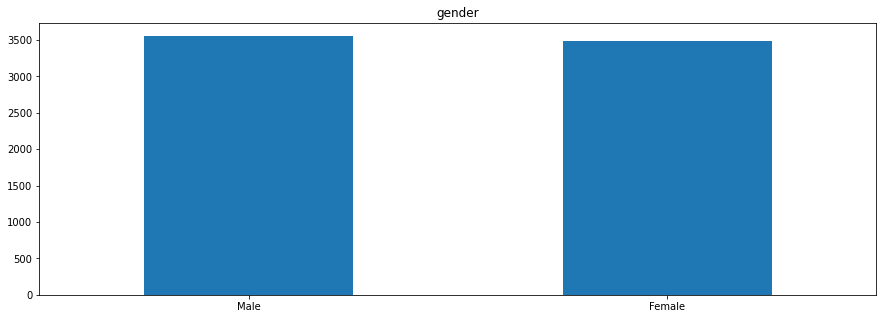

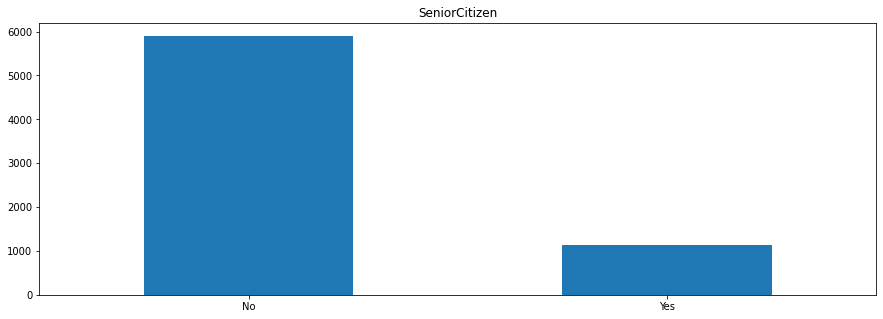

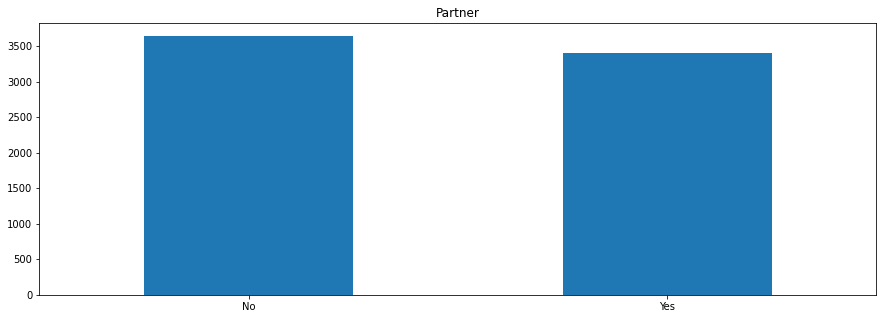

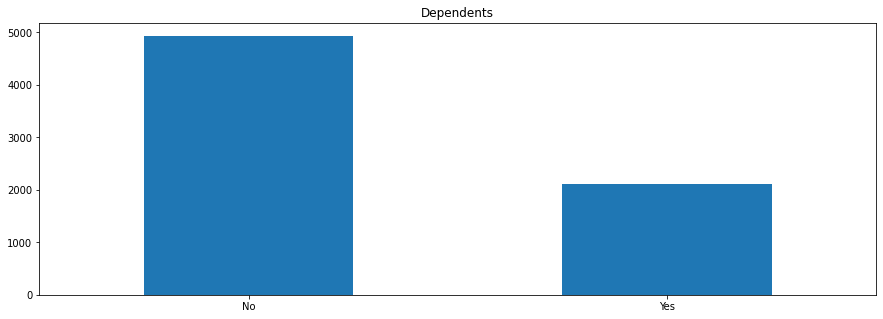

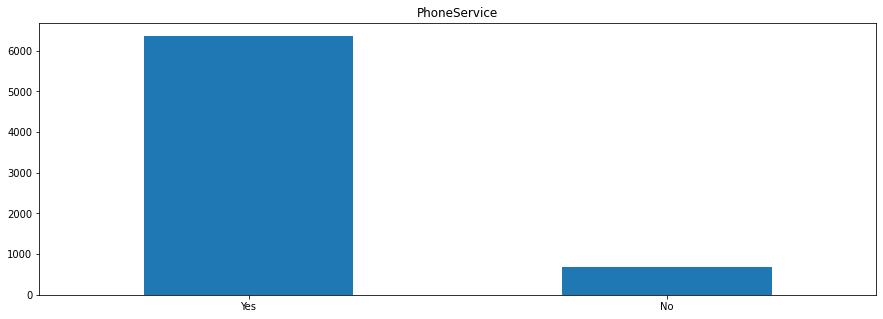

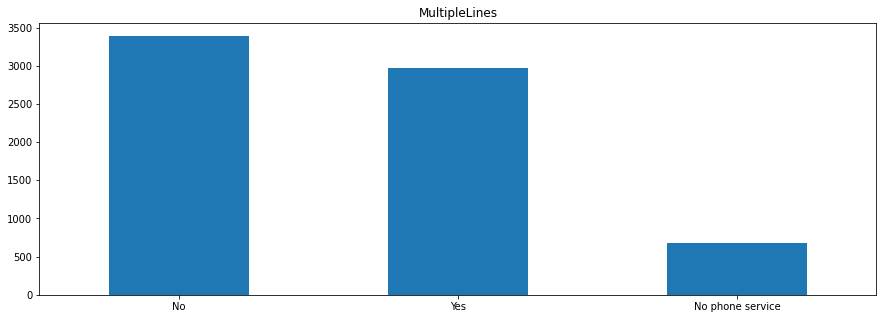

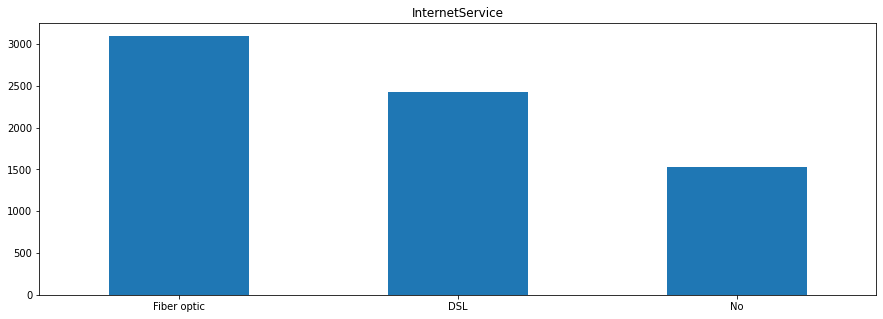

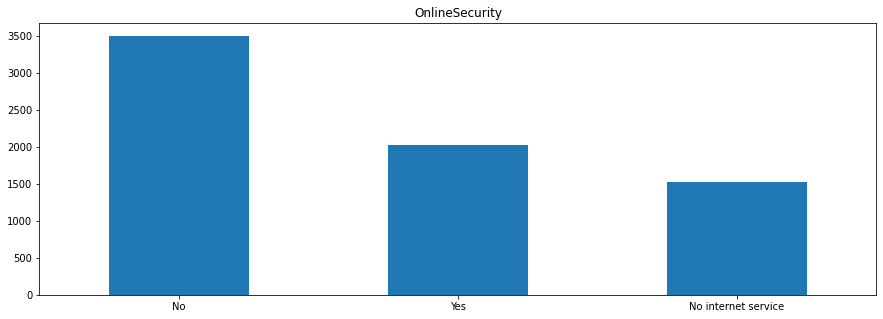

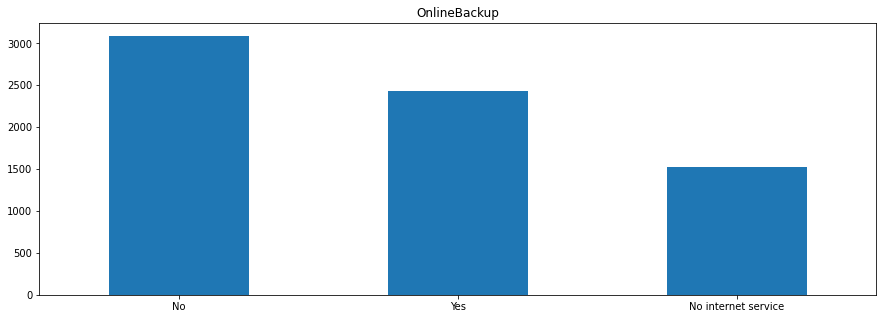

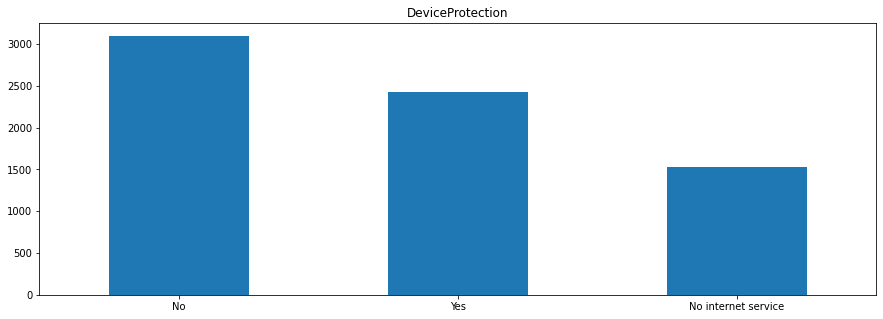

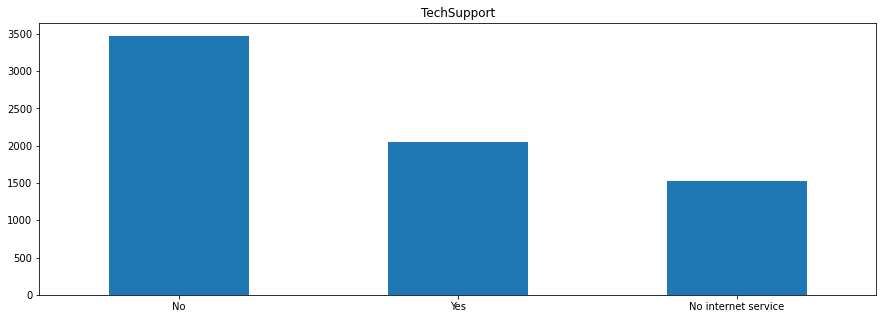

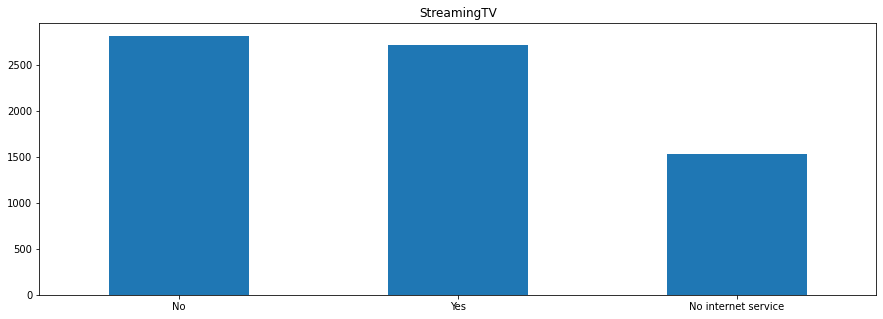

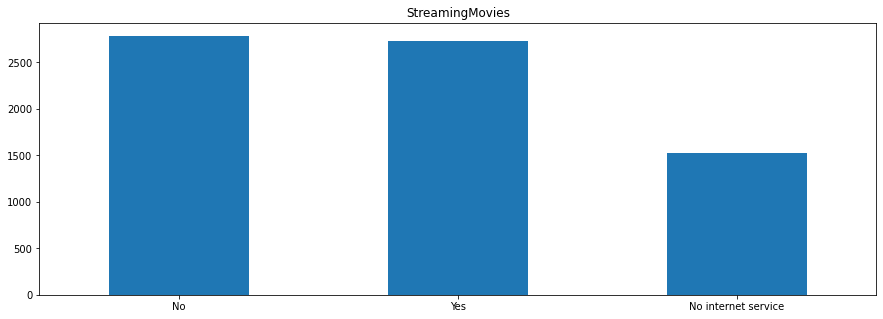

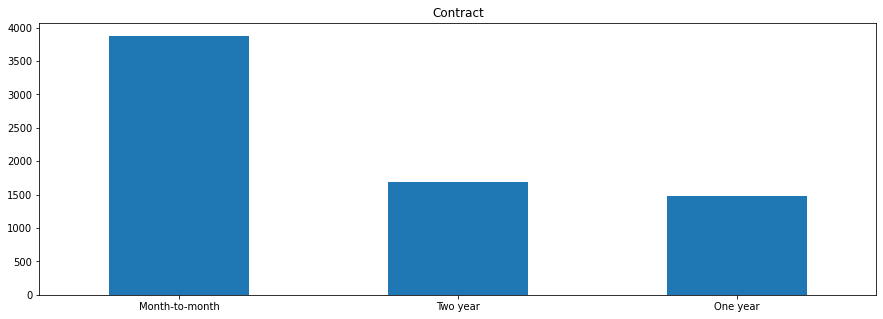

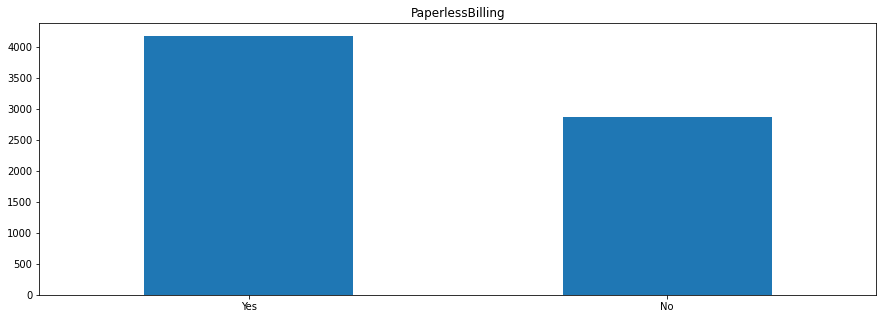

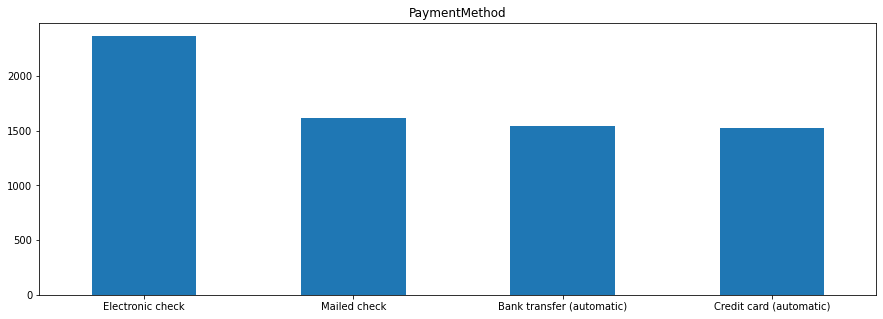

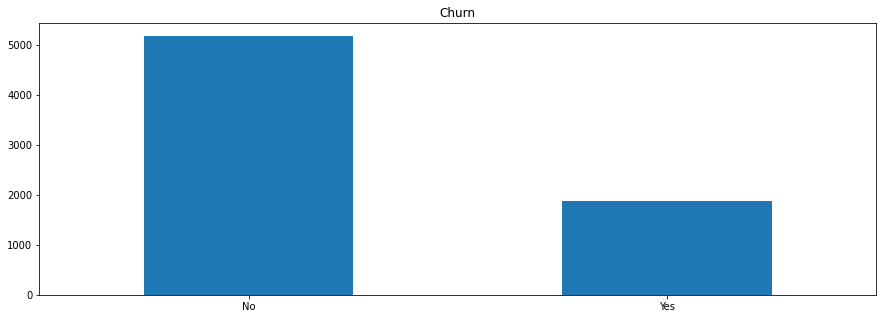

In [9]:
for col in object_cols[1:]:
    data[col].value_counts().plot(kind = 'bar', figsize = (15, 5))
    plt.title(col)
    plt.xticks(rotation = 360)
    plt.show()

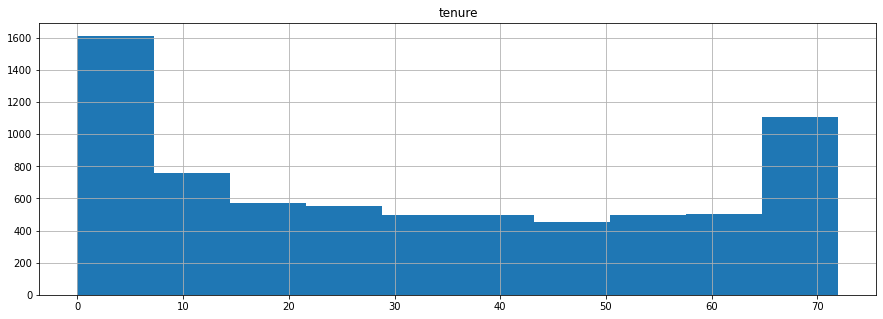

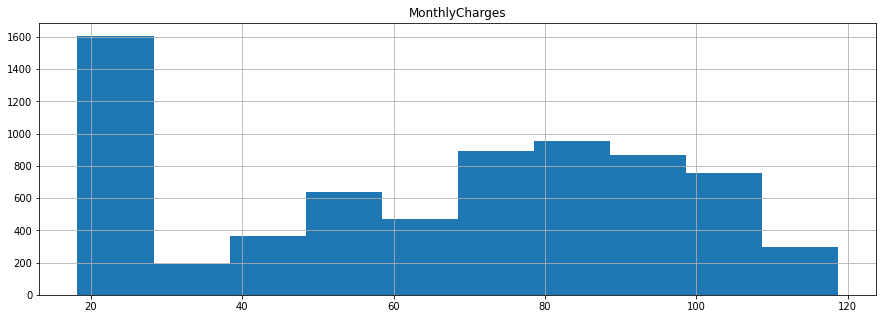

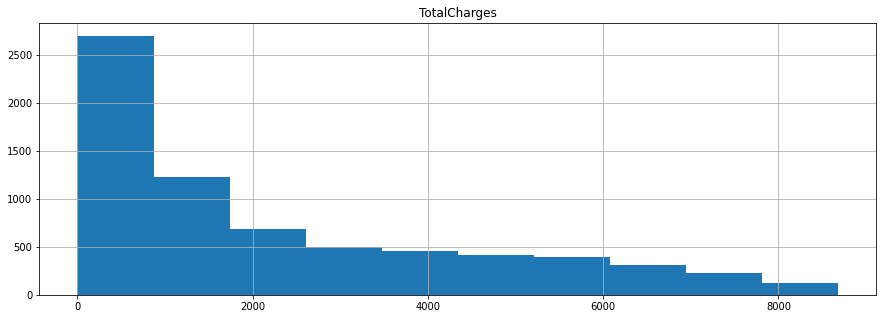

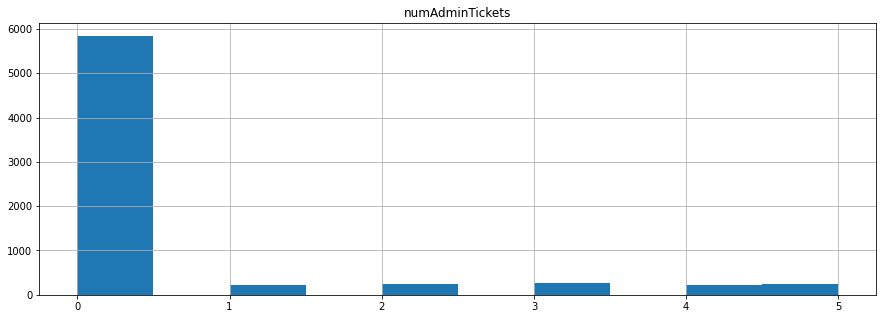

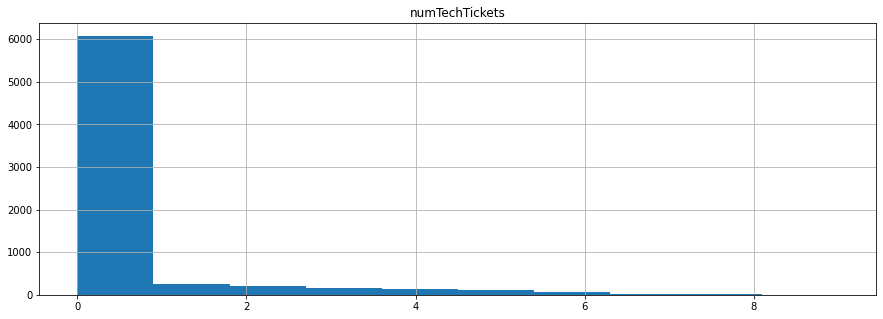

In [10]:
for col in numeric_cols:
    data[col].hist(figsize = (15, 5))
    plt.title(col)
    plt.show()

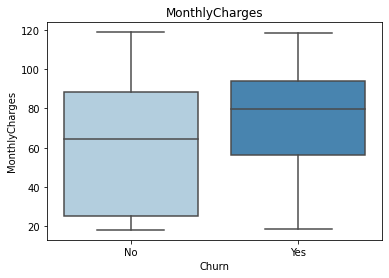

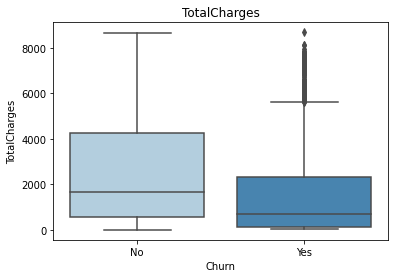

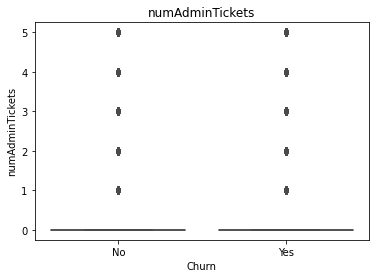

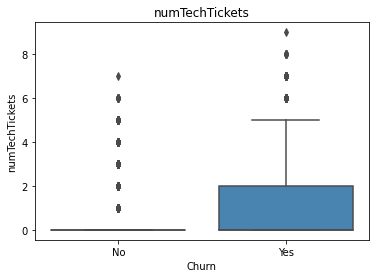

In [11]:
for col in numeric_cols[1:]:
    sns.boxplot(x = data['Churn'], y = data[col], palette='Blues')
    # data[col].hist(figsize = (15, 5))
    plt.title(col)
    plt.show()

### 1. Tenure
- Unsurprisingly, customers who churn are usually the ones who have spent less time with the company
### 2. MonthlyCharges
- As suspected, customers who churn tend to have higher monthly charges than customers who don't churn
    - Whether or not a customer can still afford to pay is likely a factor affecting churn rate
### 3. TotalCharges
- Customers who churn tend to have lower total charges than customers who don't churn
    - Likely reflecting the fact that customers who churn are usually not with the company for very long

## EDA - Exploration Data Analysis

### Demographics

In [12]:
df = data.copy()

In [13]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'numAdminTickets',
       'numTechTickets', 'Churn'],
      dtype='object')

In [14]:
gender_dist = df.gender.value_counts()
gender_dist

Male      3555
Female    3488
Name: gender, dtype: int64

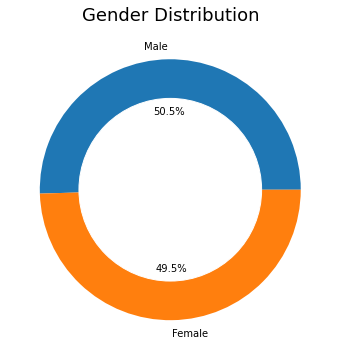

In [15]:
plt.figure(figsize = (6, 6))
plt.pie(gender_dist.values, labels = gender_dist.index, autopct='%1.1f%%')
p = plt.gcf()
p.gca().add_artist(plt.Circle((0, 0), 0.7, color = 'white'))
plt.title('Gender Distribution', size = 18)
plt.show()

In [16]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
0,7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0,No
1,5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,0,No
2,3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,0,0,Yes
3,7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,3,No
4,9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,0,0,Yes


<AxesSubplot:>

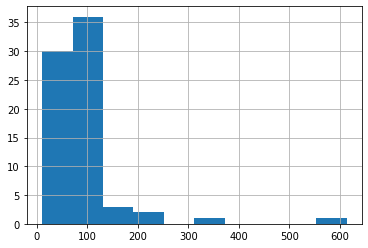

In [17]:
df.tenure.value_counts().hist()

In [18]:
df['tenure_in_years'] = np.where(df['tenure'] <= 12, '< 1 year', df['tenure'])
df['tenure_in_years'] = np.where((df['tenure'] > 12) & (df['tenure'] <= 24), '< 2 years', df['tenure_in_years'])
df['tenure_in_years'] = np.where((df['tenure'] > 24) & (df['tenure'] <= 36), '< 3 years', df['tenure_in_years'])
df['tenure_in_years'] = np.where((df['tenure'] > 36) & (df['tenure'] <= 48), '< 4 years', df['tenure_in_years'])
df['tenure_in_years'] = np.where((df['tenure'] > 48) & (df['tenure'] <= 60), '< 5 years', df['tenure_in_years'])
df['tenure_in_years'] = np.where((df['tenure'] > 60) & (df['tenure'] <= 72), '< 6 years', df['tenure_in_years'])

In [19]:
loyalty = pd.DataFrame(df.groupby(['Churn', 'tenure_in_years'])['tenure_in_years'].count())
loyalty = loyalty.rename(columns = {'tenure_in_years': 'tenure_in_years', 'tenure_in_years': 'count'})

In [20]:
loyalty = loyalty.reset_index()

In [21]:
loyalty.loc[loyalty.Churn == 'No', 'percentage'] = round(loyalty.loc[loyalty.Churn == 'No', 'count'] / \
loyalty.loc[loyalty.Churn == 'No', 'count'].sum() * 100, 2)

loyalty.loc[loyalty.Churn == 'Yes', 'percentage'] = round(loyalty.loc[loyalty.Churn == 'Yes', 'count'] / \
loyalty.loc[loyalty.Churn == 'Yes', 'count'].sum() * 100, 2)

In [22]:
loyalty

,Churn,tenure_in_years,count,percentage
0,No,< 1 year,1149,22.21
1,No,< 2 years,730,14.11
2,No,< 3 years,652,12.60
3,No,< 4 years,617,11.93
4,No,< 5 years,712,13.76
5,No,< 6 years,1314,25.40
6,Yes,< 1 year,1037,55.48
7,Yes,< 2 years,294,15.73
8,Yes,< 3 years,180,9.63
9,Yes,< 4 years,145,7.76


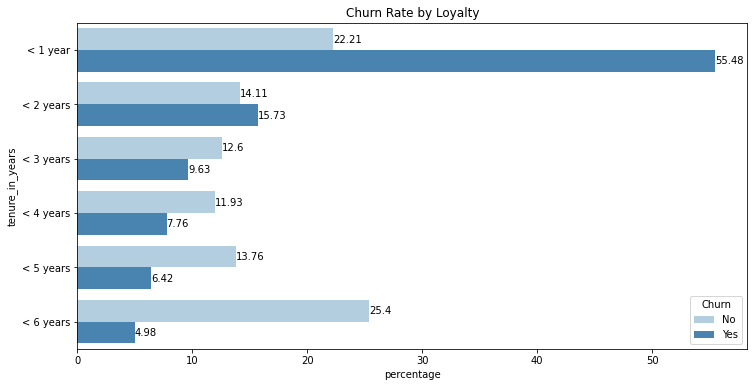

In [23]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x = 'percentage', y = 'tenure_in_years', hue = 'Churn', data = loyalty, orient='h', palette='Blues')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Churn Rate by Loyalty')
plt.show()

### Customer Account Information

In [24]:
payment_method = pd.DataFrame(df.groupby(['Churn', 'PaymentMethod'])['PaymentMethod'].count())
payment_method = payment_method.rename(columns = {'PaymentMethod': 'PaymentMethod', 'PaymentMethod': 'count'})
payment_method = payment_method.reset_index()
payment_method.loc[payment_method.Churn == 'No', 'percentage'] = round(payment_method.loc[payment_method.Churn == 'No', 'count'] / \
payment_method.loc[payment_method.Churn == 'No', 'count'].sum() * 100, 2)
payment_method.loc[payment_method.Churn == 'Yes', 'percentage'] = round(payment_method.loc[payment_method.Churn == 'Yes', 'count'] / \
payment_method.loc[payment_method.Churn == 'Yes', 'count'].sum() * 100, 2)

In [25]:
payment_method

,Churn,PaymentMethod,count,percentage
0,No,Bank transfer (automatic),1286,24.86
1,No,Credit card (automatic),1290,24.93
2,No,Electronic check,1294,25.01
3,No,Mailed check,1304,25.20
4,Yes,Bank transfer (automatic),258,13.80
5,Yes,Credit card (automatic),232,12.41
6,Yes,Electronic check,1071,57.30
7,Yes,Mailed check,308,16.48


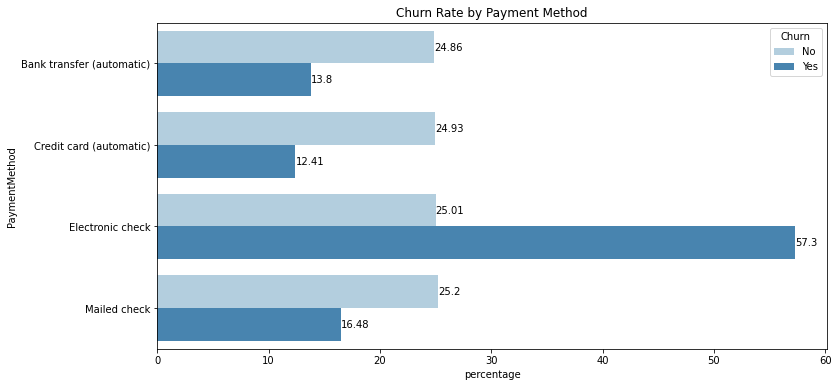

In [26]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x = 'percentage', y = 'PaymentMethod', hue = 'Churn', data = payment_method, orient='h', palette='Blues')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Churn Rate by Payment Method')
plt.show()

In [27]:
contract_type = pd.DataFrame(df.groupby(['Churn', 'Contract'])['Contract'].count())
contract_type = contract_type.rename(columns = {'Contract': 'Contract', 'Contract': 'count'})
contract_type = contract_type.reset_index()
contract_type.loc[contract_type.Churn == 'No', 'percentage'] = round(contract_type.loc[contract_type.Churn == 'No', 'count'] / \
contract_type.loc[contract_type.Churn == 'No', 'count'].sum() * 100, 2)
contract_type.loc[contract_type.Churn == 'Yes', 'percentage'] = round(contract_type.loc[contract_type.Churn == 'Yes', 'count'] / \
contract_type.loc[contract_type.Churn == 'Yes', 'count'].sum() * 100, 2)

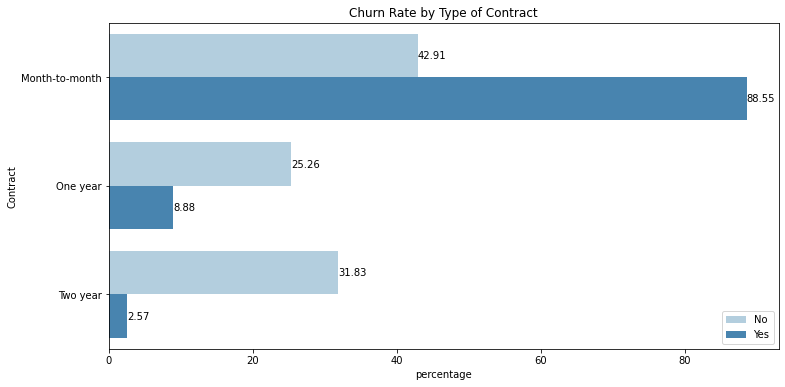

In [28]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x = 'percentage', y = 'Contract', hue = 'Churn', data = contract_type, orient='h', palette='Blues')
for container in ax.containers:
    ax.bar_label(container)
plt.title('Churn Rate by Type of Contract')
plt.legend(loc = 'lower right')
plt.show()

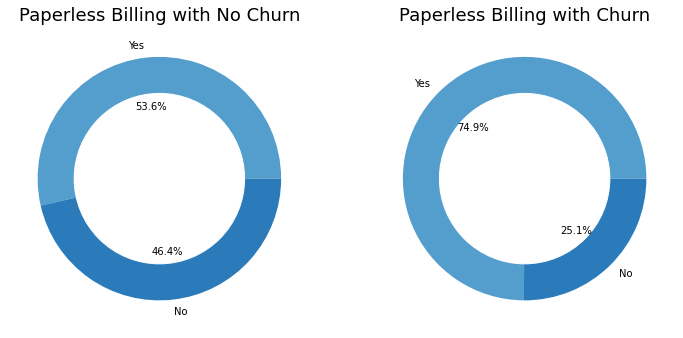

In [29]:
nonchurn_paperless_billing = df[df.Churn=='No'].PaperlessBilling.value_counts()
churn_paperless_billing = df[df.Churn=='Yes'].PaperlessBilling.value_counts()
colors = sns.color_palette('Blues')[3:]
plt.figure(figsize = (12, 6))
plt.subplot(1, 2, 1)
plt.pie(nonchurn_paperless_billing.values, labels = nonchurn_paperless_billing.index, autopct='%1.1f%%', colors = colors)
p = plt.gcf()
p.gca().add_artist(plt.Circle((0, 0), 0.7, color = 'white'))
plt.title('Paperless Billing with No Churn', size = 18)
plt.subplot(1, 2, 2)
plt.pie(churn_paperless_billing.values, labels = churn_paperless_billing.index, autopct='%1.1f%%', colors = colors)
p = plt.gcf()
p.gca().add_artist(plt.Circle((0, 0), 0.7, color = 'white'))
plt.title('Paperless Billing with Churn', size = 18)
plt.show()

In [30]:
charges_by_churn = pd.DataFrame(df.groupby('Churn').agg(averageMonthlyCharges = ('MonthlyCharges', np.mean), averageTotalCharges = ('TotalCharges', np.mean)))
charges_by_churn = charges_by_churn.reset_index()
charges_by_churn

,Churn,averageMonthlyCharges,averageTotalCharges
0,No,61.265124,2549.911442
1,Yes,74.441332,1531.796094


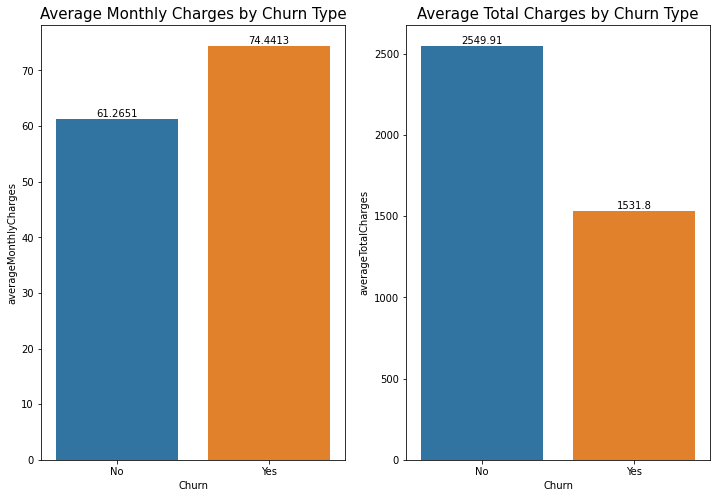

In [31]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 8))
ax1 = sns.barplot(x = 'Churn', y = 'averageMonthlyCharges', data = charges_by_churn, ax = ax1)
ax1.set_title('Average Monthly Charges by Churn Type', size = 15)
ax2 = sns.barplot(x = 'Churn', y = 'averageTotalCharges', data = charges_by_churn, ax = ax2)
ax2.set_title('Average Total Charges by Churn Type', size = 15)
for container in ax1.containers:
    ax1.bar_label(container)
for container in ax2.containers:
    ax2.bar_label(container)

In [32]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'numAdminTickets',
       'numTechTickets', 'Churn', 'tenure_in_years'],
      dtype='object')

In [33]:
services_df = df[['InternetService', 'PhoneService', 'MultipleLines',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Churn']]

In [34]:
services_df

,InternetService,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Churn
0,DSL,No,No phone service,No,Yes,No,No,No,No,No
1,DSL,Yes,No,Yes,No,Yes,No,No,No,No
2,DSL,Yes,No,Yes,Yes,No,No,No,No,Yes
3,DSL,No,No phone service,Yes,No,Yes,Yes,No,No,No
4,Fiber optic,Yes,No,No,No,No,No,No,No,Yes
...,...,...,...,...,...,...,...,...,...,...
7038,DSL,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,No
7039,Fiber optic,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No
7040,DSL,No,No phone service,Yes,No,No,No,No,No,No
7041,Fiber optic,Yes,Yes,No,No,No,No,No,No,Yes


Text(0.5, 1.0, 'Churn Rate by Non-Phone Service Users')

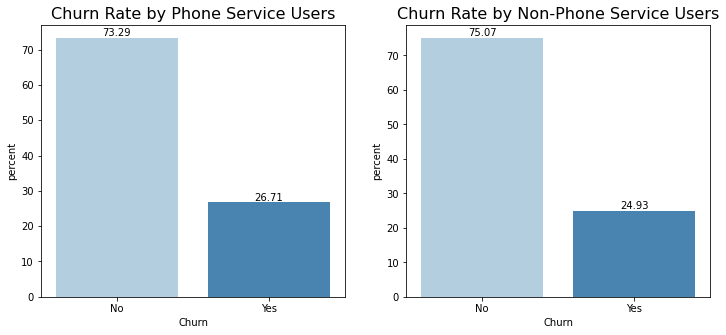

In [35]:
phone = pd.DataFrame(services_df.groupby('PhoneService').Churn.value_counts(normalize = True) * 100)
phone = phone.rename(columns = {'Churn': 'percent'})
phone = phone.reset_index()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 5))
# plt.figure(figsize = (12, 6))
ax = sns.barplot(x = 'Churn', y = 'percent', data = phone[phone.PhoneService == 'Yes'], palette='Blues', ax = ax1) 
for container in ax.containers:
    ax.bar_label(container, fmt = '%.2f')
ax.set_title('Churn Rate by Phone Service Users', size = 16)

ax2 = sns.barplot(x = 'Churn', y = 'percent', data = phone[phone.PhoneService == 'No'], palette='Blues', ax = ax2) 
for container in ax2.containers:
    ax2.bar_label(container, fmt = '%.2f')
ax2.set_title('Churn Rate by Non-Phone Service Users', size = 16)

In [36]:
internet_df = pd.DataFrame(services_df.groupby('InternetService').Churn.value_counts(normalize = True) * 100)
internet_df = internet_df.rename(columns = {'Churn': 'percent'})
internet_df = internet_df.reset_index()
internet_df

,InternetService,Churn,percent
0,DSL,No,81.040892
1,DSL,Yes,18.959108
2,Fiber optic,No,58.107235
3,Fiber optic,Yes,41.892765
4,No,No,92.595020
5,No,Yes,7.404980


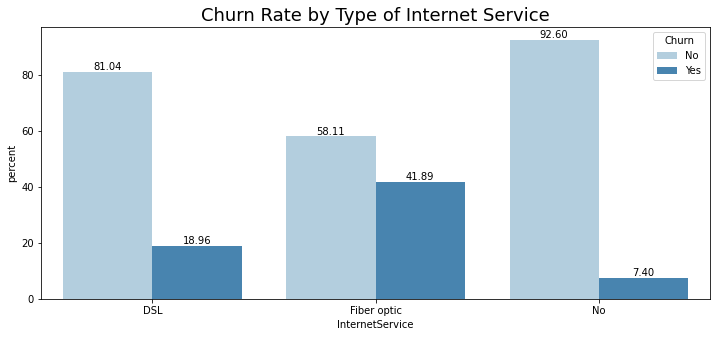

In [37]:
plt.figure(figsize = (12, 5))
ax = sns.barplot(x = 'InternetService', y = 'percent', hue = 'Churn', data = internet_df, palette='Blues')
for container in ax.containers:
    ax.bar_label(container, fmt = '%.2f')
ax.set_title('Churn Rate by Type of Internet Service', size = 18)
plt.show()

In [38]:
def create_plot(df, criteria):
    temp_df = pd.DataFrame(df.groupby(f'{criteria}').Churn.value_counts(normalize = True) * 100)
    temp_df = temp_df.rename(columns = {'Churn': 'percent'})
    temp_df = temp_df.reset_index()
    plt.figure(figsize = (12, 5))
    ax = sns.barplot(x = f'{criteria}', y = 'percent', data = temp_df[temp_df.Churn == 'Yes'], palette='Blues')
    for container in ax.containers:
        ax.bar_label(container, fmt = '%.2f')
    ax.set_title(f'Churn Rate by Type of {criteria}', size = 18)
    plt.show()

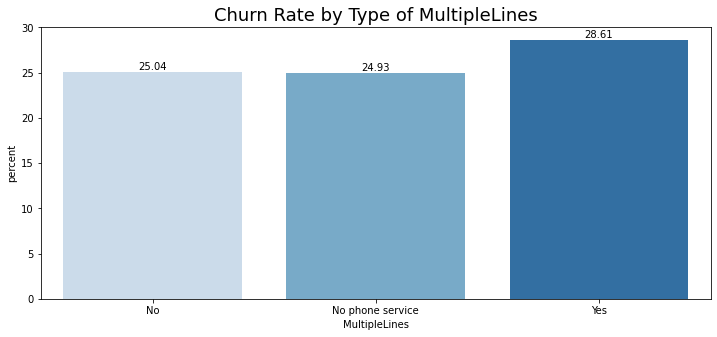

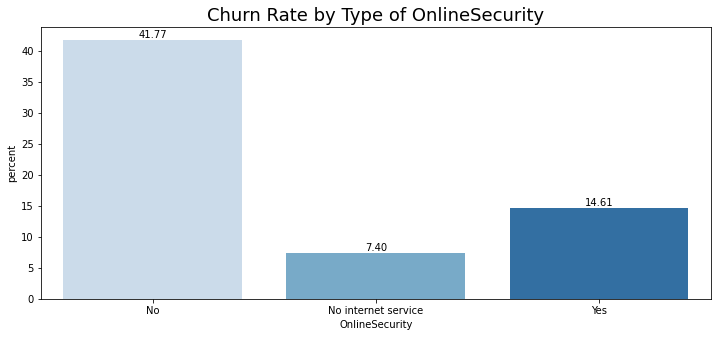

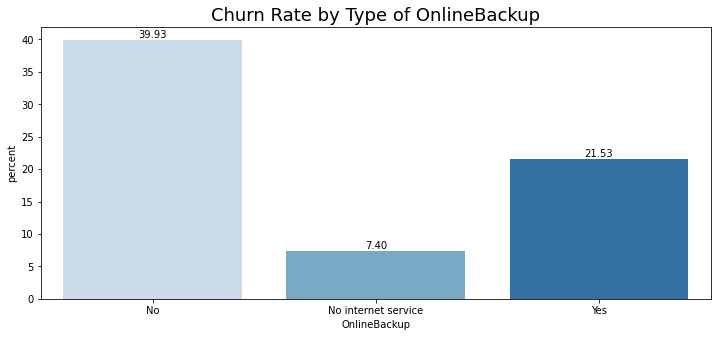

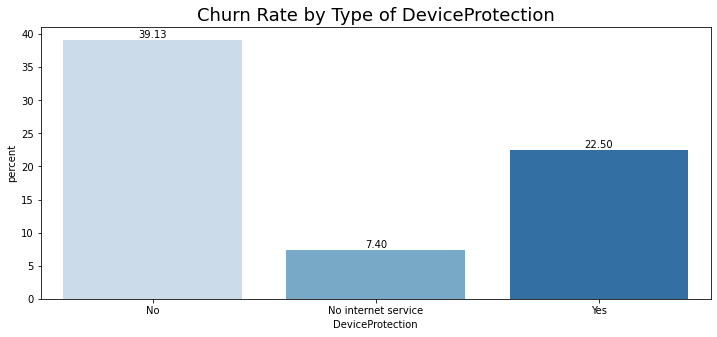

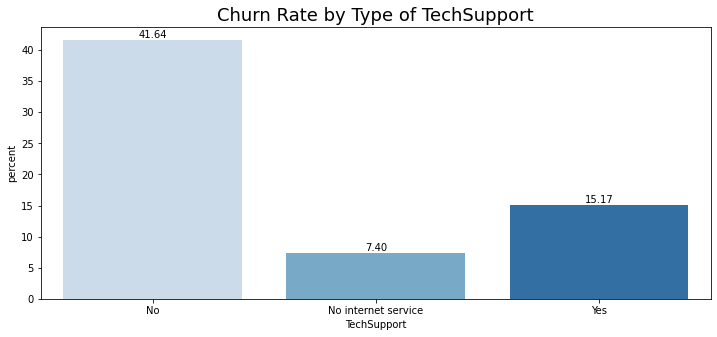

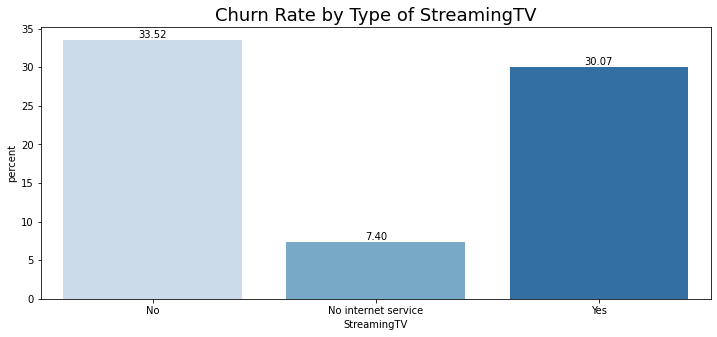

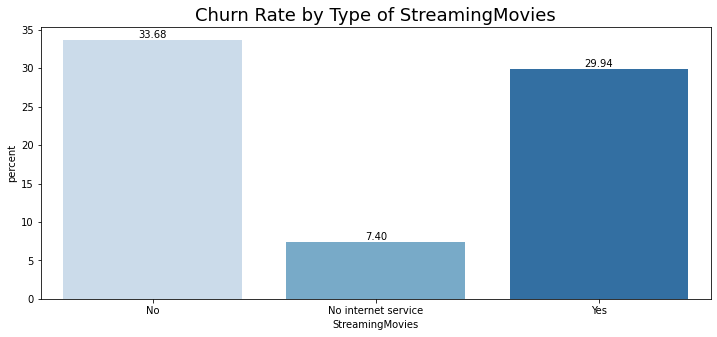

In [39]:
for col in services_df.iloc[:, 2:-1].columns:
    create_plot(services_df, col)

### Seemingly important features:
- Contract: the longer the contract, the less likely a customer is to churn.
- PaymentMethod: customers paying via electronic check are more likely to churn.
- OnlineSecurity: customers with no online security are more likely to churn.
- TechSupport: customers receiving no tech support are more likely to churn.

### Seemingly unimportant features:
- PhoneService and MultipleLines: both have similar distributions across their different categories.
- The distributions aren't as balanced as the one we see with gender, so while the two features may not contribute much to the model, it might be worth keeping them in the end.

## Data Preprocessing

In [94]:
model_df = df.drop(columns=['customerID', 'tenure_in_years'], axis = 1)

In [95]:
model_df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,numAdminTickets,numTechTickets,Churn
0,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,0,No
1,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0,0,No
2,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,0,0,Yes
3,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,3,No
4,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,0,0,Yes


In [96]:
model_df.InternetService.value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [97]:
model_df['MultipleLines_Ordinal'] = model_df['MultipleLines'].replace({'No phone service': 0, 'No': 1, 'Yes': 2})
model_df['InternetService_Ordinal'] = model_df['InternetService'].replace({'No': 0, 'DSL': 1, 'Fiber optic': 2})
model_df['Contract_Ordinal'] = model_df['Contract'].replace({'Month-to-month': 0, 'One year': 1, 'Two year': 2})

In [98]:
model_df = model_df.drop(['MultipleLines', 'InternetService', 'Contract', 'numAdminTickets', 'numTechTickets'], axis = 1)
model_df

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,MultipleLines_Ordinal,InternetService_Ordinal,Contract_Ordinal
0,Female,No,Yes,No,1,No,No,Yes,No,No,No,No,Yes,Electronic check,29.85,29.85,No,0,1,0
1,Male,No,No,No,34,Yes,Yes,No,Yes,No,No,No,No,Mailed check,56.95,1889.50,No,1,1,1
2,Male,No,No,No,2,Yes,Yes,Yes,No,No,No,No,Yes,Mailed check,53.85,108.15,Yes,1,1,0
3,Male,No,No,No,45,No,Yes,No,Yes,Yes,No,No,No,Bank transfer (automatic),42.30,1840.75,No,0,1,1
4,Female,No,No,No,2,Yes,No,No,No,No,No,No,Yes,Electronic check,70.70,151.65,Yes,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,Male,No,Yes,Yes,24,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Mailed check,84.80,1990.50,No,2,1,1
7039,Female,No,Yes,Yes,72,Yes,No,Yes,Yes,No,Yes,Yes,Yes,Credit card (automatic),103.20,7362.90,No,2,2,1
7040,Female,No,Yes,Yes,11,No,Yes,No,No,No,No,No,Yes,Electronic check,29.60,346.45,No,0,1,0
7041,Male,Yes,Yes,No,4,Yes,No,No,No,No,No,No,Yes,Mailed check,74.40,306.60,Yes,2,2,0


In [99]:
OH_col_names = ['SeniorCitizen', 'Partner', 'Dependents', 
           'PaperlessBilling', 'PhoneService', 'OnlineSecurity', 
           'OnlineBackup', 'DeviceProtection', 'TechSupport',
           'StreamingTV', 'StreamingMovies', 'PaymentMethod',]

In [100]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols = pd.DataFrame(encoder.fit_transform(model_df[OH_col_names]))

In [101]:
OH_cols.columns = encoder.get_feature_names_out(OH_col_names)

In [102]:
OH_cols.index = model_df.index
model_df.drop(OH_col_names, axis = 1, inplace = True)
model_df = pd.concat([model_df, OH_cols], axis = 1)

In [103]:
model_df = model_df.drop('gender', axis = 1)

In [104]:
model_df['Churn'] = model_df['Churn'].replace({'No': 0, 'Yes': 1})

In [105]:
model_df

,tenure,MonthlyCharges,TotalCharges,Churn,MultipleLines_Ordinal,InternetService_Ordinal,Contract_Ordinal,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PaperlessBilling_No,PaperlessBilling_Yes,PhoneService_No,PhoneService_Yes,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,29.85,29.85,0,0,1,0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,34,56.95,1889.50,0,1,1,1,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2,53.85,108.15,1,1,1,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3,45,42.30,1840.75,0,0,1,1,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2,70.70,151.65,1,1,2,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,84.80,1990.50,0,2,1,1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
7039,72,103.20,7362.90,0,2,2,1,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
7040,11,29.60,346.45,0,0,1,0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7041,4,74.40,306.60,1,2,2,0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


<AxesSubplot:>

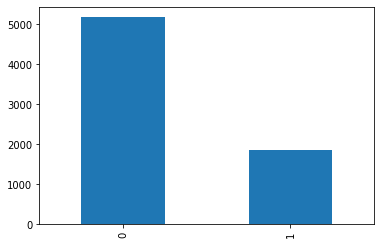

In [106]:
model_df.Churn.value_counts().plot(kind = 'bar')

### Model 01: LogisticRegression

(10348, 38) (10348,)
AUC Score on dataset untuned: 0.8775893571113136
AUC Score on dataset tuned: 0.8790762889952315


<Figure size 864x432 with 0 Axes>

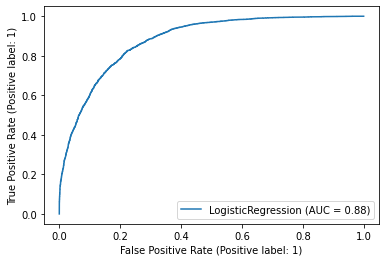

In [115]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, cross_val_score, RepeatedStratifiedKFold
from sklearn.metrics import RocCurveDisplay


X = model_df.drop(['Churn'], axis = 1)
y = model_df['Churn']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2002)

sm = SMOTE(k_neighbors = 5)
X_resampled, y = sm.fit_resample(X, y)
print(X_resampled.shape, y.shape)

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=42)

scale_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

scaler = StandardScaler()
scaler.fit(X_resampled[scale_cols])
X_resampled[scale_cols] = scaler.transform(X_resampled[scale_cols])
# X_test[scale_cols] = scaler.transform(X_test[scale_cols])

model_log = LogisticRegression(max_iter=1000)
model_log.fit(X_resampled, y)
scores = cross_val_score(model_log, X_resampled, y, cv = cv, scoring = 'roc_auc')
print('AUC Score on dataset untuned: {}'.format(scores.mean()))
# print('AUC Score on Test set untuned: {}'.format(model_log.score(X_test, y_test)))

fixed_params = {'dual': False, 
                'random_state': 42,
                'n_jobs': 1,
                'max_iter': 1000
               }
lr = LogisticRegression(**fixed_params)
param_grid = {'solver': ['lbfgs', 'sag', 'newton-cg', 'liblinear'],
              'penalty': ['l2'],
              'C': [100, 10, 1.0, 0.1, 0.01, 0.001]}
search_lr = GridSearchCV(estimator = lr, param_grid = param_grid, scoring = 'roc_auc', refit = True, cv = cv)
search_lr.fit(X_resampled, y)

print('AUC Score on dataset tuned: {}'.format(search_lr.best_score_))
# print('AUC Score on Test set tuned: {}'.format(search_lr.score(X_test, y_test)))

plt.figure(figsize = (12, 6))
ax = RocCurveDisplay.from_estimator(search_lr.best_estimator_, X_resampled, y)
plt.show()


### Model 2: XGBoost Classifier

In [116]:
import xgboost as xgb
# from scipy.stats import randint as sp_randint
# from scipy.stats import uniform as sp_randfloat 
# from sklearn.model_selection import GridSearchCV, cross_val_score, RepeatedStratifiedKFold
# from sklearn.metrics import RocCurveDisplay


X = model_df.drop(['Churn'], axis = 1)
y = model_df['Churn']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2002)

sm = SMOTE(k_neighbors = 5)
X_resampled, y = sm.fit_resample(X, y)
print(X_resampled.shape, y.shape)

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=42)

scale_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

scaler = MinMaxScaler()
scaler.fit(X_resampled[scale_cols])
X_resampled[scale_cols] = scaler.transform(X_resampled[scale_cols])
# X_test[scale_cols] = scaler.transform(X_test[scale_cols])

model_xgb = xgb.XGBClassifier(n_estimators=200, random_state = 2002, objective='binary:logistic')
model_xgb.fit(X_resampled, y)
scores = cross_val_score(model_xgb, X_resampled, y, cv = cv, scoring = 'roc_auc')
print('AUC Score on dataset untuned: {}'.format(scores.mean()))
# print('AUC Score on Test set untuned: {}'.format(model_xgb.score(X_test, y_test)))

# fixed_params = {'objective': 'binary:logistic', 
#                 'random_state': 42,
#                 'n_jobs': 1,
#                 # 'max_iter': 1000
#                }
# xgb = xgb.XGBClassifier(**fixed_params)
# param_grid = {'max_depth': [i for i in range(3, 6)],
#               'learning_rate': [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3],
#               'n_estimators': [i for i in range(100, 500, 50)],
#               'subsample': [0.6, 0.7, 0.8, 0.9, 1.0],
#               'reg_alpha': [0.001, 0.01, 0.1, 1],
#               'reg_lambda': [0.001, 0.01, 0.1, 1, 10, 100],
#              }
# search_xgb = GridSearchCV(estimator = xgb, param_grid = param_grid, scoring = 'roc_auc', refit = True, cv = cv)
# search_xgb.fit(X_train_resample, y_train_resample)

# print('AUC Score on Train set tuned: {}'.format(search_xgb.best_score_))
# print('AUC Score on Test set tuned: {}'.format(search_xgb.score(X_test, y_test)))

# plt.figure(figsize = (12, 6))
# ax = RocCurveDisplay.from_estimator(search_xgb.best_estimator_, X_test, y_test)
# plt.show()


(10348, 38) (10348,)
AUC Score on dataset untuned: 0.9334287109702359


### Model 3: Gradient Boosting Classifier

In [118]:
from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.model_selection import GridSearchCV, cross_val_score, RepeatedStratifiedKFold
# from sklearn.metrics import RocCurveDisplay


X = model_df.drop(['Churn'], axis = 1)
y = model_df['Churn']

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2002)

sm = SMOTE(k_neighbors = 5)
X_resampled, y = sm.fit_resample(X, y)
print(X_resampled.shape, y.shape)

cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=42)

scale_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

scaler = MinMaxScaler()
scaler.fit(X_resampled[scale_cols])
X_resampled[scale_cols] = scaler.transform(X_resampled[scale_cols])
# X_test[scale_cols] = scaler.transform(X_test[scale_cols])

model_gbc = GradientBoostingClassifier()
model_gbc.fit(X_resampled, y)
scores = cross_val_score(model_gbc, X_resampled, y, cv = cv, scoring = 'roc_auc')
print('AUC Score on dataset untuned: {}'.format(scores.mean()))
# print('AUC Score on Test set untuned: {}'.format(model_xgb.score(X_test, y_test)))

# fixed_params = {'objective': 'binary:logistic', 
#                 'random_state': 42,
#                 'n_jobs': 1,
#                 # 'max_iter': 1000
#                }
# xgb = GradientBoostingClassifier()
# param_grid = {
#     "n_estimators": [300],
#     "max_depth": [5, 10, 30],
#     "learning_rate": [0.01, 0.05, 0.1]
# }
# search_xgb = GridSearchCV(estimator = xgb, param_grid = param_grid, scoring = 'roc_auc', refit = True, cv = cv)
# search_xgb.fit(X_resampled, y_train_resample)

# print('AUC Score on Train set tuned: {}'.format(search_xgb.best_score_))
# print('AUC Score on Test set tuned: {}'.format(search_xgb.score(X_test, y_test)))

# plt.figure(figsize = (12, 6))
# ax = RocCurveDisplay.from_estimator(search_xgb.best_estimator_, X_test, y_test)
# plt.show()


(10348, 38) (10348,)
AUC Score on dataset untuned: 0.9408210270486531
